<a href="https://colab.research.google.com/github/naufal-01/Crime-Analyzer/blob/main/Crime_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load the Dataset
First, we load the dataset using pandas, which is a powerful library for data manipulation and analysis.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/crime analyzer/Sample Crime Dataset.xlsx - Sheet1.csv')

# Display the first few rows of the dataframe
df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,8/25/07 9:22,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,8/17/15 15:03,NaN,NaN,NaN
1,25953,JE240540,5/24/21 15:06,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/23 15:39,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,6/26/21 9:24,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/23 15:39,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/9/23 7:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,11/18/23 15:39,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/23 7:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/9/23 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"


Here, pd.read_csv reads the dataset from a CSV file into a pandas DataFrame. The df.head() function displays the first few rows to give us an idea of the data structure.

#2. Temporal Analysis
Temporal analysis helps us understand how crime trends vary over time.

**2.1 Crime Trends Over Time**

We convert the 'Date' column to datetime format and extract the year and month to analyze crime trends over time.

<ipython-input-36-833ba43b58ab>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


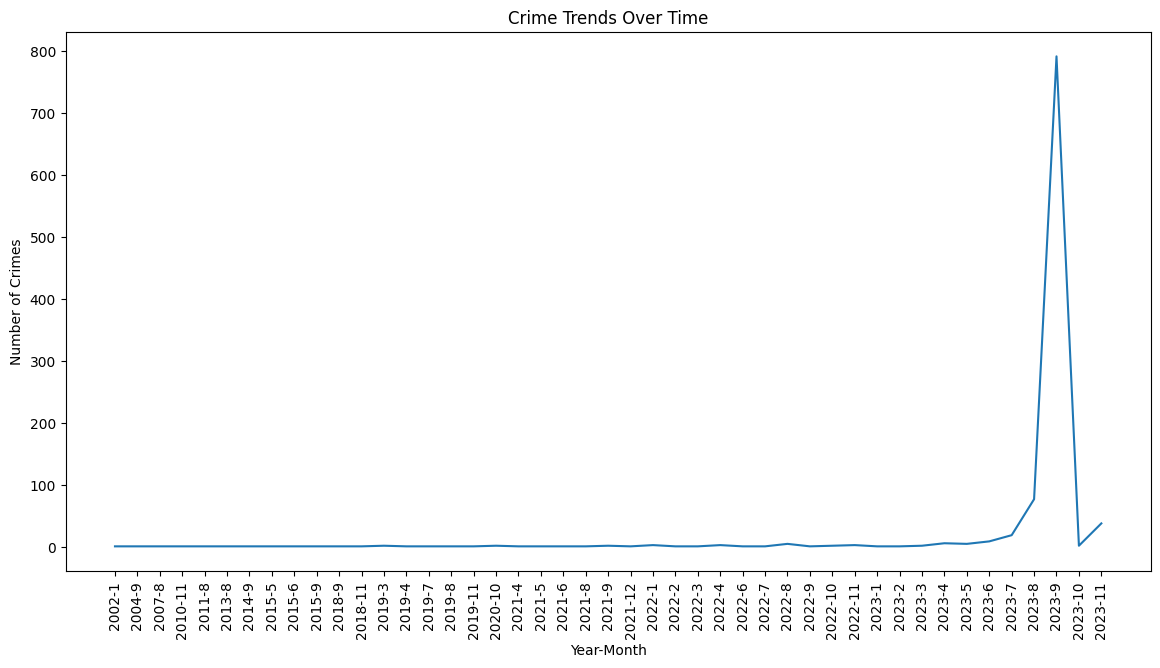

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month
crime_trends = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Plot the trends
plt.figure(figsize=(14, 7))
plt.plot(crime_trends['Year'].astype(str) + '-' + crime_trends['Month'].astype(str), crime_trends['Count'])
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.title('Crime Trends Over Time')
plt.show()


This code extracts the year and month from the 'Date' column and groups the data by these new columns to count the number of crimes per time period. It then plots the trend over time.

**2.2 Peak Crime Hours**

We extract the hour from the 'Date' column to find out the times of day when crimes are most frequent.**bold text**

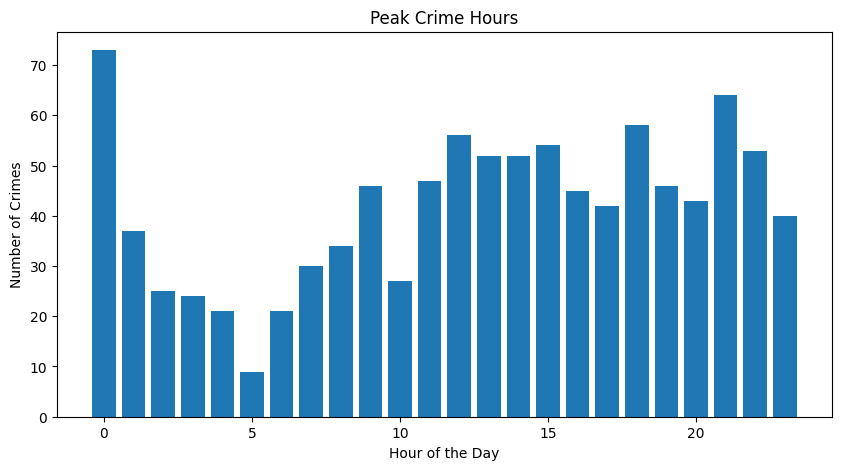

In [ ]:
# Extract hour
df['Hour'] = df['Date'].dt.hour

# Group by hour
peak_hours = df.groupby('Hour').size().reset_index(name='Count')

# Plot the peak hours
plt.figure(figsize=(10, 5))
plt.bar(peak_hours['Hour'], peak_hours['Count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Peak Crime Hours')
plt.show()


This code extracts the hour from the 'Date' column, groups the data by hour, counts the number of crimes per hour, and plots the distribution.

#3. Geospatial Analysis
Geospatial analysis helps identify crime hotspots and patterns based on location.

**3.1 Crime Hotspots**

We use the folium library to create a heatmap of crime locations.

In [ ]:
import folium
from folium.plugins import HeatMap

# Filter for non-null latitude and longitude
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a base map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add heat map
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map
m.save('/content/drive/MyDrive/crime analyzer/crime_heatmap.html')


This code creates a heatmap showing areas with high concentrations of crimes. It uses the latitude and longitude of crime incidents to plot them on a map.

**3.2 District/Ward Analysis**

We analyze crime rates across different police districts.

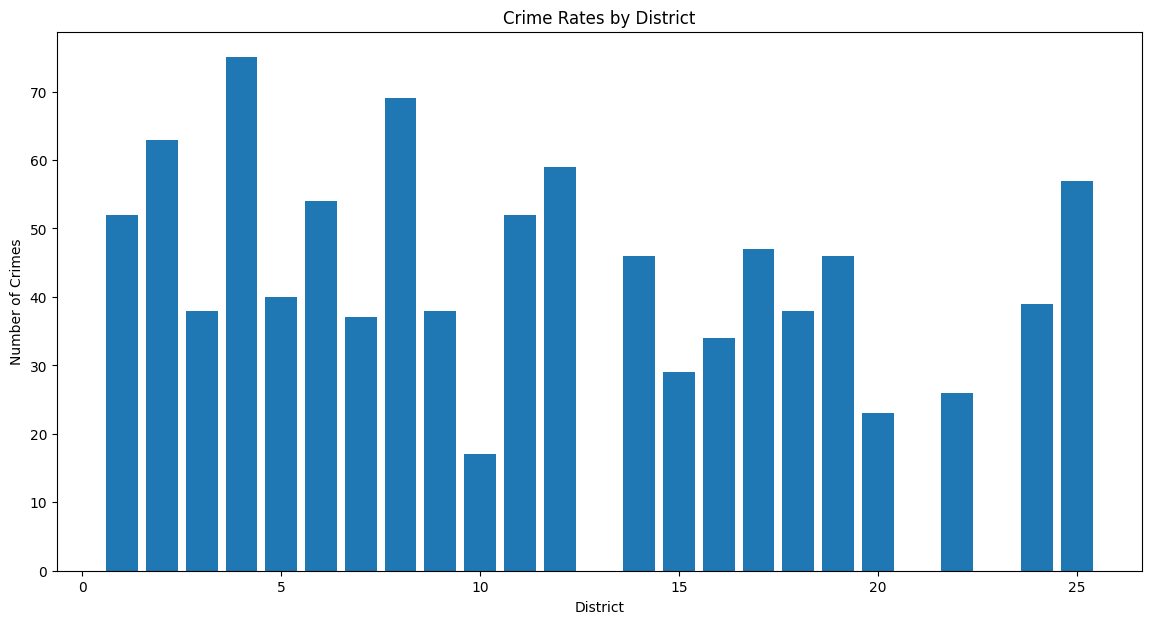

In [ ]:
# Group by district
district_analysis = df.groupby('District').size().reset_index(name='Count')

# Plot the district analysis
plt.figure(figsize=(14, 7))
plt.bar(district_analysis['District'], district_analysis['Count'])
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.title('Crime Rates by District')
plt.show()


This code groups the data by police district, counts the number of crimes in each district, and plots the distribution.

#4. Crime Type Analysis
Understanding the distribution of different crime types is crucial for resource allocation.

**4.1 Distribution of Crime Types**

We analyze the frequency of different types of crimes.

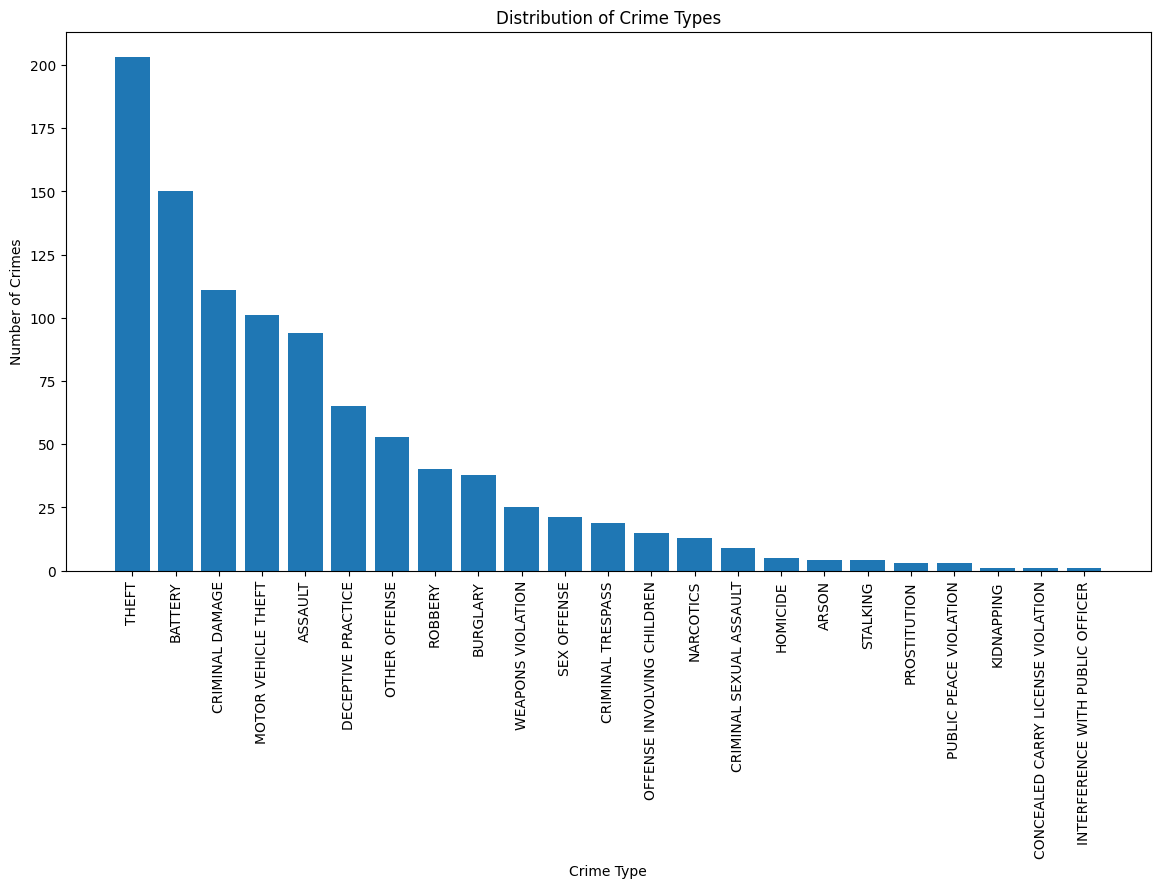

In [ ]:
# Group by primary type
crime_type_distribution = df['Primary Type'].value_counts().reset_index()
crime_type_distribution.columns = ['Primary Type', 'Count']

# Plot the distribution
plt.figure(figsize=(14, 7))
plt.bar(crime_type_distribution['Primary Type'], crime_type_distribution['Count'])
plt.xticks(rotation=90)
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crime Types')
plt.show()


This code counts the number of incidents for each crime type and plots the distribution.

#5. Arrest and Domestic Incident Analysis

Analyzing arrest rates and domestic incidents helps understand law enforcement effectiveness and crime nature.

**5.1 Arrest Rates**

We calculate the arrest rates for different crime types.

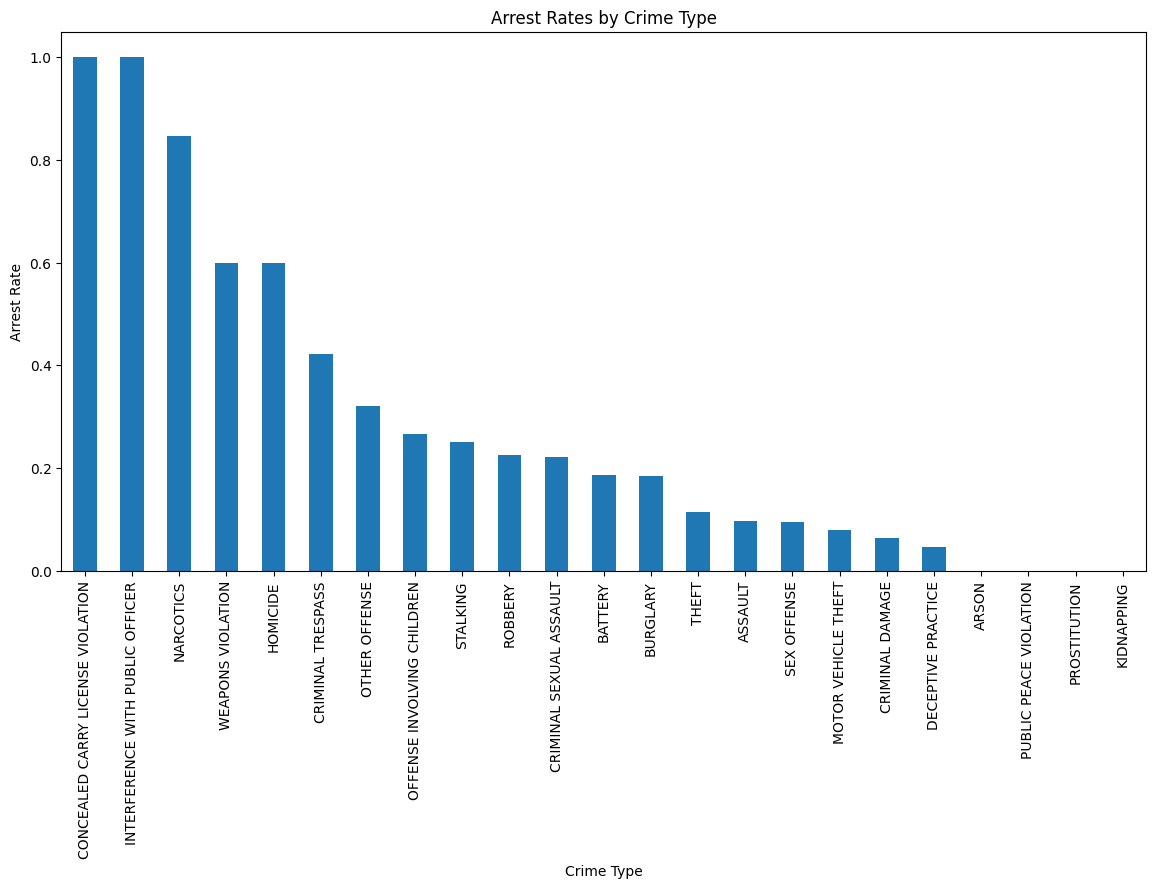

In [ ]:
# Group by primary type and arrest status
arrest_rates = df.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)
arrest_rates['Arrest Rate'] = arrest_rates[True] / (arrest_rates[True] + arrest_rates[False])

# Plot the arrest rates
arrest_rates['Arrest Rate'].sort_values(ascending=False).plot(kind='bar', figsize=(14, 7))
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rates by Crime Type')
plt.show()


This code groups the data by crime type and arrest status, calculates the arrest rates, and plots them.

#6. Location-Specific Analysis
We analyze crime occurrences in different locations.

**6.1 Location Description Analysis**

We investigate the most common locations for crimes.

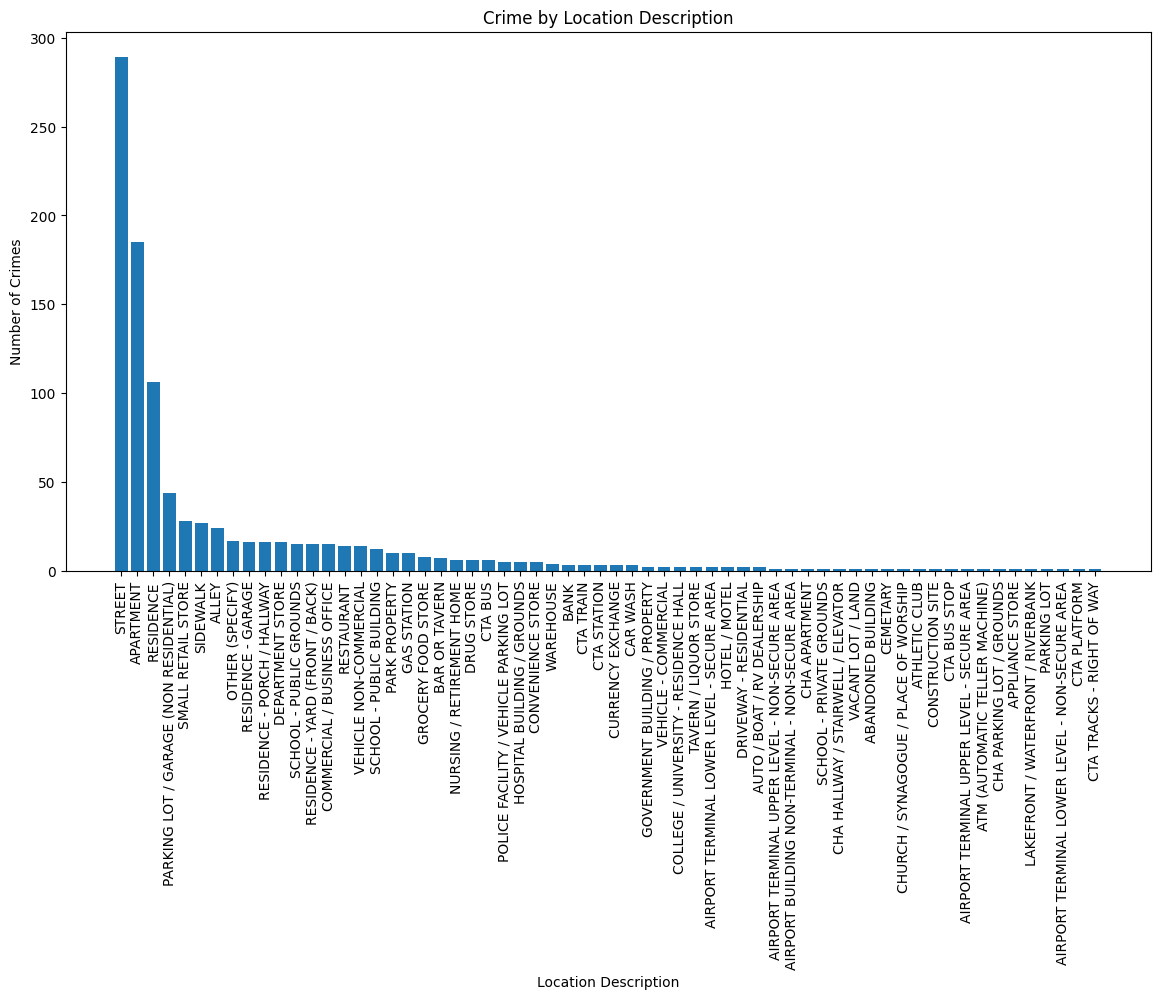

In [ ]:
# Group by location description
location_description_analysis = df['Location Description'].value_counts().reset_index()
location_description_analysis.columns = ['Location Description', 'Count']

# Plot the location description analysis
plt.figure(figsize=(14, 7))
plt.bar(location_description_analysis['Location Description'], location_description_analysis['Count'])
plt.xticks(rotation=90)
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.title('Crime by Location Description')
plt.show()


#7. Seasonal and Weather Impact
We examine whether crime occurrences vary by season.

**7.1 Seasonal Trends**

We analyze crime trends across different months.

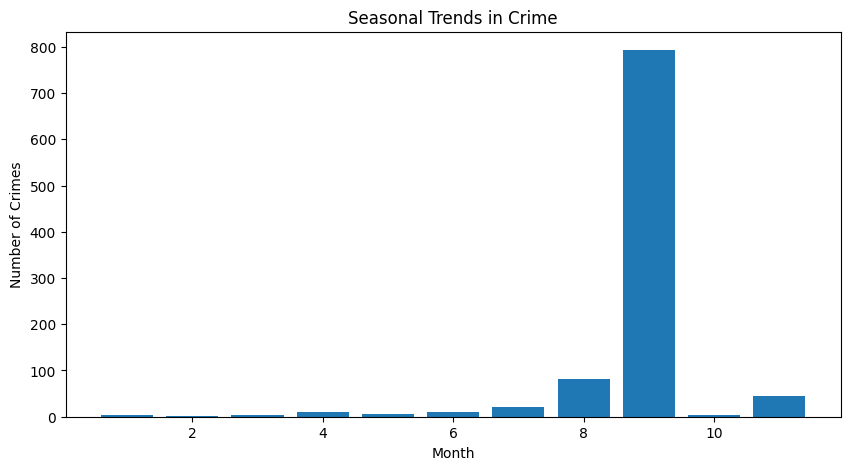

In [ ]:
# Group by month
seasonal_trends = df.groupby('Month').size().reset_index(name='Count')

# Plot the seasonal trends
plt.figure(figsize=(10, 5))
plt.bar(seasonal_trends['Month'], seasonal_trends['Count'])
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Seasonal Trends in Crime')
plt.show()


This code groups the data by month, counts the number of crimes in each month, and plots the distribution.

#8. Predictive Modeling and Risk Assessment
We can build predictive models to forecast future crime incidents and assess risks.

**Logistic Regression for Predicting Arrests**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Feature selection
features = ['Year', 'Month', 'Hour', 'District', 'Ward', 'Community Area']
X = df[features]
y = df['Arrest']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.80      0.99      0.89       236
        True       0.33      0.02      0.03        58

    accuracy                           0.80       294
   macro avg       0.57      0.50      0.46       294
weighted avg       0.71      0.80      0.72       294

[[234   2]
 [ 57   1]]


This code uses logistic regression to predict the likelihood of an arrest based on features such as year, month, hour, district, ward, and community area. It splits the data into training and testing sets, trains the model, makes predictions, and evaluates the model's performance.